In [128]:
#Importing Packages
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta, binom

#Prior hyperparameters
alpha0= 1
beta0 = 1

#Control data
data = np.array([[9, 11, 4, 21, 12, 0], [6, 7, 6, 18, 17, 10]])

#Posterior hyperparameters
alpha1 = alpha0 + sum(data[0, :])
beta1 = beta0 + sum(data[1, :])

#Summing the number of trials (patients) in each study
n = data[0, :] + data[1, :]

#Test statistics - using min and range of the number of successes

def test_statistic(data): 
    return min(data)  
  
#Number of successes in control group
data_c_treated = data_control[0, :]

#Running test statistics on original data
tester = test_statistic(data_c_treated)

#Generate posterior data samples
samples = beta.rvs(alpha1, beta1, size=1000)

data= []

for i in range(len(samples)):
  a= binom.rvs(n,samples[i]) 
  data.append(test_statistic(a)) #Computing test statistics
  

#Counting to get the p-value
counts = 0
for i in range(len(data)):
    if data[i] > tester:
        counts+=1
        
#P-value
print ('P-value:', counts/len(data))

P-value: 0.99


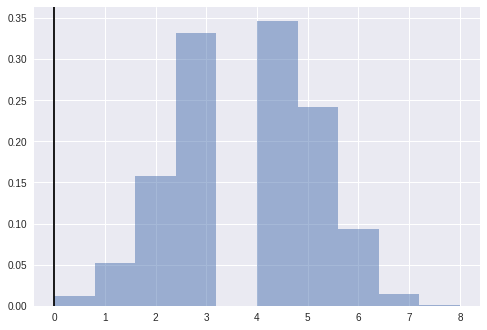

In [129]:
#Plotting histogram

plt.hist(data,alpha=0.5, density=True)
plt.axvline(tester, color='black')

## Justification and Report

I chose to use the minimum of the number of successful trials as my test statistic, and as we see above, the p-value gotten (0.99) is greater than 0.95, which shows that the non - hierarchical model does not explain the control group data well. 

I chose this test statistic because one of the studies in the data has a huge outlier (with the number of successes being 0) and it is important that this information is captured in the posterior predictive distribution. For the model to explain the control group data well, getting a minimum value of 0 in the predicted samples of the number of successes in each of the studies should not be rare. 

A reason why this model might not explain the control group data well is that the same probability of success is used for all the studies. If the model was modified to make each study have its own probability of success, the control group data might be explained better.